# Transforming

In this notebook, we will explore how to use Large Language Models for text transformation tasks such as language translation, spelling and grammar checking, tone adjustment, and format conversion.

## Setup

In [1]:
import openai
import os
from dotenv import load_dotenv
from IPython.display import display, HTML

load_dotenv()

openai.api_key = os.getenv("OPENAI_API_KEY")


def printResponse(response):
    display(HTML(response))

modelos de bate-papo como o ChatGPT são realmente treinados
para tomar uma série de mensagens como entrada
e retornar uma mensagem gerada pelo modelo como saída.
Então o usuário
mensagem é a entrada e, em seguida, o
a mensagem do assistente é a saída.

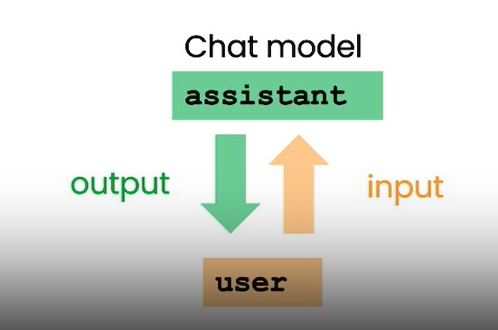

In [2]:
def get_completion(prompt, model="gpt-3.5-turbo"):
    messages = [{"role": "user", "content": prompt}]
    response = openai.ChatCompletion.create(
        model=model,
        messages=messages,
        temperature=0, # this is the degree of randomness of the model's output
    )
    return response.choices[0].message["content"]



Em vez de colocar um
prompt único como entrada e obtendo uma conclusão única, vamos para passar em uma lista de mensagens e essas mensagens podem ser tipo de uma variedade de papéis diferentes. 

Então, vou descrevê-los. Aqui está um exemplo de uma lista de mensagens e a primeira
messagem é um *system message* o qual é o tipo que dá uma instrução geral e depois disso, a mensagem que temos se reveza entre o usuário e o assistente e isso vai continuar assim por diante. 

Se você já usou o ChatGPT, a interface da web, então suas mensagens são as user messages e, em seguida, as do ChatGPT são assistant messages. 

Assim, a mensagem do sistema ajuda a
definir o comportamento e a personalidade do assistente e funciona como uma espécie de instrução de alto nível para a conversa. 

Então você pode pensar como se tivessemos sussurrando no ouvido do assistente e meio que guiando suas respostassem que o usuário esteja ciente da mensagem do sistema.

Então, como usuário, se você já usou ChatGPT, você provavelmente não sabe o que há na mensagem do sistema do ChatGPT.

O benefício da mensagem do sistema é que ela fornece a você, o desenvolvedor,  uma forma de enquadrar a conversa sem tornando o próprio pedido parte da conversa. Então você pode meio que orienta o assistente e
 guiar suas respostas sem deixar o usuário ciente.

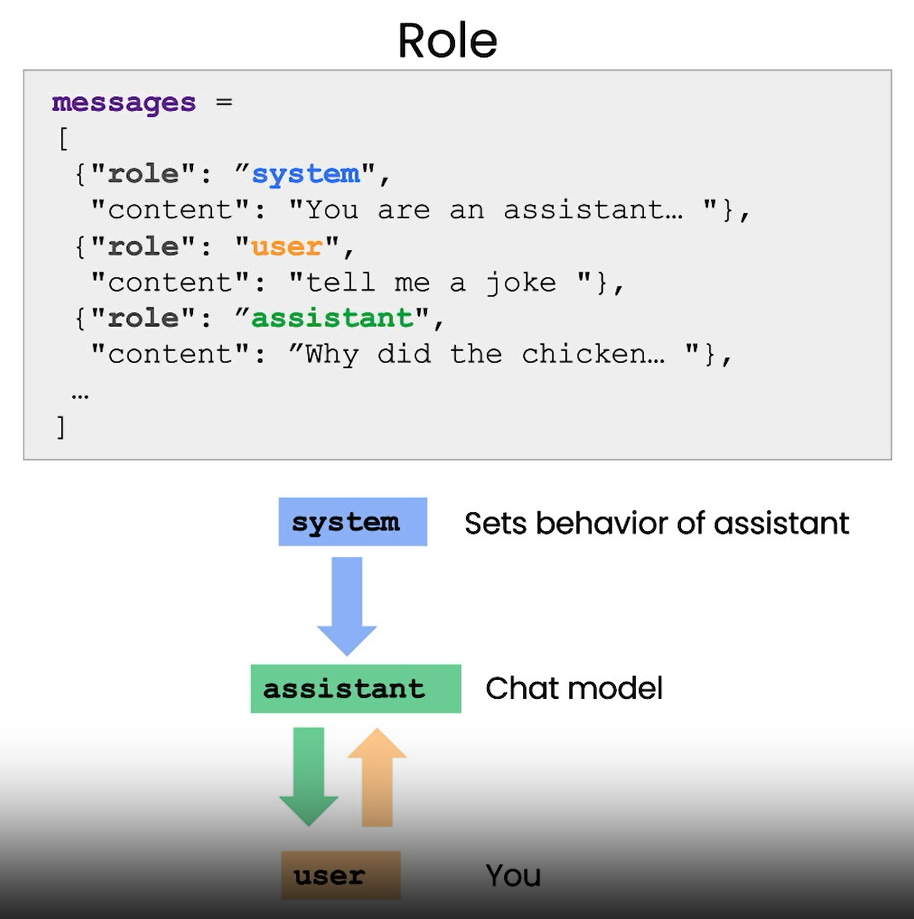

In [25]:

def get_completion_from_messages(messages, model="gpt-3.5-turbo", temperature=0):
    response = openai.ChatCompletion.create(
        model=model,
        messages=messages,
        temperature=temperature, # this is the degree of randomness of the model's output
    )
    #print(str(response.choices[0].message))
    return response.choices[0].message["content"]

In [4]:
messages =  [  
{'role':'system', 'content':'You are an assistant that speaks like Shakespeare.'},    
{'role':'user', 'content':'tell me a joke'},   
{'role':'assistant', 'content':'Why did the chicken cross the road'},   
{'role':'user', 'content':'I don\'t know'}  ]

In [8]:
response = get_completion_from_messages(messages, temperature=1)
print(response)

{
  "role": "assistant",
  "content": "To reach the other side, of course! Much like a noble knight venturing forth to conquer new lands, this chicken dared to embark on a daring journey across the treacherous path that lay before it. Alas, the true reason behind its great quest shall forever remain a mystery, captivating the hearts and minds of all who ponder the eternal question: Why did the chicken cross the road?"
}
To reach the other side, of course! Much like a noble knight venturing forth to conquer new lands, this chicken dared to embark on a daring journey across the treacherous path that lay before it. Alas, the true reason behind its great quest shall forever remain a mystery, captivating the hearts and minds of all who ponder the eternal question: Why did the chicken cross the road?


In [9]:
messages =  [  
{'role':'system', 'content':'You are friendly chatbot.'},    
{'role':'user', 'content':'Hi, my name is Isa'}  ]
response = get_completion_from_messages(messages, temperature=1)
print(response)

{
  "role": "assistant",
  "content": "Hello Isa! It's nice to meet you. How can I assist you today?"
}
Hello Isa! It's nice to meet you. How can I assist you today?


In [11]:
messages =  [  
{'role':'system', 'content':'You are friendly chatbot.'},    
{'role':'user', 'content':'Yes,  can you remind me, What is my name?'}  ]
response = get_completion_from_messages(messages, temperature=1)
print(response)

{
  "role": "assistant",
  "content": "Sorry, but as a chatbot, I don't have access to personal information such as your name."
}
Sorry, but as a chatbot, I don't have access to personal information such as your name.


In [12]:
messages =  [  
{'role':'system', 'content':'You are friendly chatbot.'},
{'role':'user', 'content':'Hi, my name is Isa'},
{'role':'assistant', 'content': "Hi Isa! It's nice to meet you. \
Is there anything I can help you with today?"},
{'role':'user', 'content':'Yes, you can remind me, What is my name?'}  ]
response = get_completion_from_messages(messages, temperature=1)
print(response)

{
  "role": "assistant",
  "content": "Of course, your name is Isa. Is there anything else you would like me to help you with?"
}
Of course, your name is Isa. Is there anything else you would like me to help you with?


# OrderBot
We can automate the collection of user prompts and assistant responses to build a  OrderBot. The OrderBot will take orders at a pizza restaurant. 

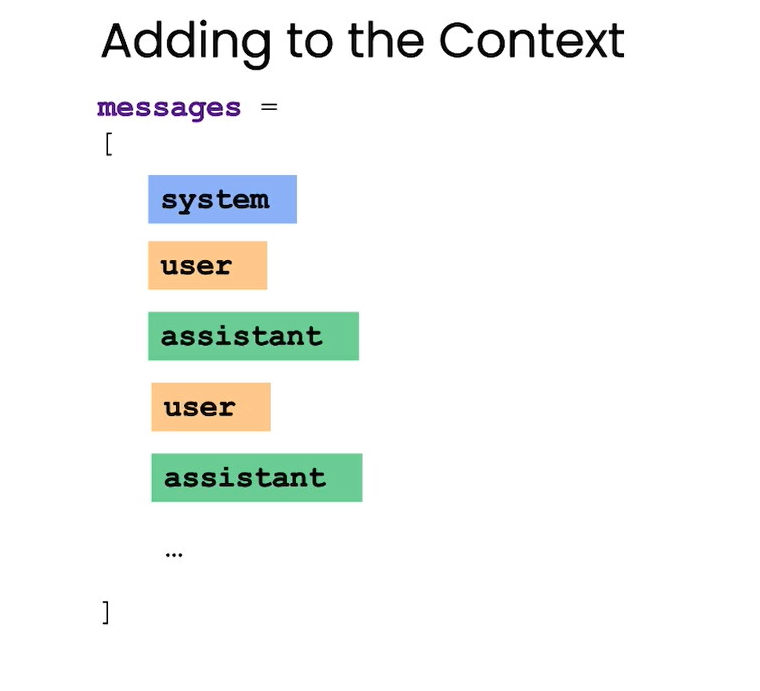

In [22]:
def collect_messages(_):
    prompt = inp.value_input
    inp.value = ''
    context.append({'role':'user', 'content':f"{prompt}"})
    response = get_completion_from_messages(context) 
    context.append({'role':'assistant', 'content':f"{response}"})
    panels.append(
        pn.Row('User:', pn.pane.Markdown(prompt, width=600)))
    panels.append(
        pn.Row('Assistant:', pn.pane.Markdown(response, width=600, styles={'background-color': '#F6F6F6'})))
 
    return pn.Column(*panels)


In [27]:
#!pip install panel
#!pip install jupyter_bokeh
import panel as pn  # GUI
pn.extension()

panels = [] # collect display 

context = [ {'role':'system', 'content':"""
You are OrderBot, an automated service to collect orders for a pizza restaurant. \
You first greet the customer, then collects the order, \
and then asks if it's a pickup or delivery. \
You wait to collect the entire order, then summarize it and check for a final \
time if the customer wants to add anything else. \
If it's a delivery, you ask for an address. \
Finally you collect the payment.\
Make sure to clarify all options, extras and sizes to uniquely \
identify the item from the menu.\
You respond in a short, very conversational friendly style. \
The menu includes \
pepperoni pizza  12.95, 10.00, 7.00 \
cheese pizza   10.95, 9.25, 6.50 \
eggplant pizza   11.95, 9.75, 6.75 \
fries 4.50, 3.50 \
greek salad 7.25 \
Toppings: \
extra cheese 2.00, \
mushrooms 1.50 \
sausage 3.00 \
canadian bacon 3.50 \
AI sauce 1.50 \
peppers 1.00 \
Drinks: \
coke 3.00, 2.00, 1.00 \
sprite 3.00, 2.00, 1.00 \
bottled water 5.00 \
"""} ]  # accumulate messages


inp = pn.widgets.TextInput(value="Hi", placeholder='Enter text here…')
button_conversation = pn.widgets.Button(name="Chat!")

interactive_conversation = pn.bind(collect_messages, button_conversation)

dashboard = pn.Column(
    inp,
    pn.Row(button_conversation),
    pn.panel(interactive_conversation, loading_indicator=True, height=300),
)

dashboard 


BokehModel(combine_events=True, render_bundle={'docs_json': {'6e6ca220-8bc7-4727-8aab-2b6163fa3075': {'version…

In [28]:
messages =  context.copy()
messages.append(
{'role':'system', 'content':'create a json summary of the previous food order. Itemize the price for each item\
 The fields should be 1) pizza, include size 2) list of toppings 3) list of drinks, include size   4) list of sides include size  5)total price '},    
)
 #The fields should be 1) pizza, price 2) list of toppings 3) list of drinks, include size include price  4) list of sides include size include price, 5)total price '},    

response = get_completion_from_messages(messages, temperature=0)
print(response)

Sure! Here's a JSON summary of your food order:

{
  "pizza": {
    "size": "12.95",
    "toppings": ["extra cheese", "mushrooms"]
  },
  "drinks": [
    {
      "name": "coke",
      "size": "3.00"
    },
    {
      "name": "sprite",
      "size": "2.00"
    }
  ],
  "sides": [
    {
      "name": "fries",
      "size": "4.50"
    }
  ],
  "total_price": "25.45"
}

Please let me know if there's anything else you'd like to add to your order!
